In [2]:
from data.data_reading import data_reading
from data.data_processing import data_processing
from ruspy.estimation.estimation_transitions import estimate_transitions
from ruspy.estimation.estimation_cost_parameters import create_transition_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
beta = 0.9999
init_dict = {
    "groups": "group_4",
    "binsize": 1000,
}

In [4]:
data_reading()
repl_data = data_processing(init_dict)
trans_results= estimate_transitions(repl_data)
print(trans_results)

{'state_count': array([[29, 12, 10, ...,  0,  0,  0],
       [ 0, 12,  2, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]]), 'x': array([2.86579683e-02, 8.10810811e-02, 2.79123952e-01, 2.46039143e-01,
       1.81733458e-01, 1.30242311e-01, 4.65983225e-02, 3.72786580e-03,
       4.65983225e-04, 6.98974837e-04, 9.31966449e-04, 4.65983225e-04,
       2.32991612e-04]), 'fun': 7581.755518761861, 'trans_count': array([ 123,  348, 1198, 1056,  780,  559,  200,   16,    2,    3,    4,
          2,    1])}


In [5]:
max_state = trans_results["state_count"].shape[0]  # 388
num_bins = 50

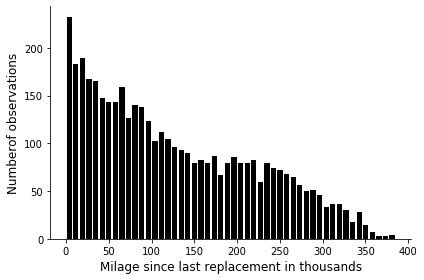

In [6]:
numobs_per_state = trans_results["state_count"].sum(axis=1)
hist_data = np.array([])
for i, val in enumerate(numobs_per_state):
    hist_data = np.append(hist_data, np.full(val, i))
hist_data = hist_data * init_dict["binsize"] / 1000

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel(r"Numberof observations")
ax.set_xlabel(r"Milage since last replacement in thousands")
# ax.set_ylim([0, 1.15 * numobs_per_state[0]])
ax.hist(hist_data, bins=num_bins, color="black", rwidth=0.8)
plt.tight_layout()
plt.savefig("../figures/fig-introduction-observations-mileage")
plt.show()

/home/maxbl/anaconda3/envs/ruspy_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


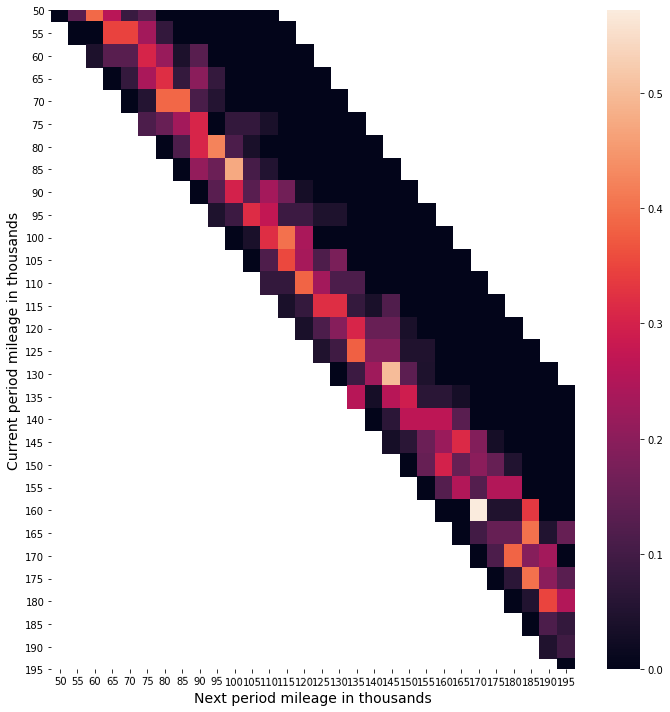

In [13]:
state_mat = trans_results["state_count"]
trans_mat = state_mat / state_mat.sum(axis=1)[:, None]
trans_mask = np.ones((state_mat.shape), dtype=bool)
for i in range(state_mat.shape[0]):
    trans_mask[i, i: i + len(trans_results['x'])] = False
start = 10
end = 40
index = range(start * 5, end * 5, 5)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sns.heatmap(
    trans_mat[start:end, start:end],
    mask=trans_mask[start:end, start:end],
    ax=ax,
    xticklabels=index,
    yticklabels=index,
)
ax.set_ylabel(r"Current period mileage in thousands", fontsize=14)
ax.set_xlabel(r"Next period mileage in thousands", fontsize=14)
plt.xticks(rotation=1)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../figures/fig-introduction-transition-matrix")
plt.show()